[array([1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017.])
 array([  0.        ,  10.        ,  10.        ,   0.2       ,
        34.29      ,  14.186     ,  10.3955    ,  12.24056   ,
        14.178741  ,  26.8655942 ,  38.71326983,  33.69005842,
        39.82984077,  44.1057992 ,  67.67879385,  55.25775438,
        82.85356118,  90.30893882, 122.32854278, 146.60932118,
       150.38602386, 179.58677541, 156.3073231 , 140.83158407,
       138.37550906])
 array([  0.        ,  10.        ,  10.        ,  -4.7       ,
        51.58      ,   4.47      ,   5.9505    ,  12.73021   ,
        15.557244  ,  33.4540264 ,  44.28388355,  29.26195365,
        40.11836844,  44.31146897,  77.46643534,  46.51889113,
        92.65147414,  91.25081987, 133.59484993, 153.25923337,
       144.25447269, 185.17709336, 136.5736757 , 124.89636368,
       100.13098013])]


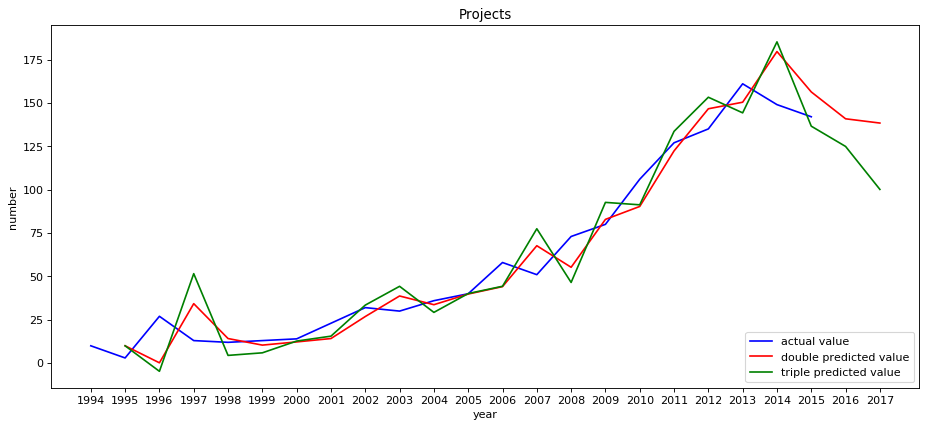

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# 指数平滑公式
def exponential_smoothing(alpha, s):
    s2 = np.zeros(s.shape)
    s2[0] = s[0]
    for i in range(1, len(s2)):
        s2[i] = alpha*s[i]+(1-alpha)*s2[i-1]
    return s2

# 绘制预测曲线
def show_data(new_year, pre_year, data, s_pre_double, s_pre_triple):
    year, time_id, number = data.T

    plt.figure(figsize=(14, 6), dpi=80)   # 设置绘图区域的大小和像素
    plt.plot(year, number, color='blue', label="actual value")   # 将实际值的折线设置为蓝色
    plt.plot(new_year[1:], s_pre_double[2:], color='red', label="double predicted value")   # 将二次指数平滑法计算的预测值的折线设置为红色
    plt.plot(new_year[1:], s_pre_triple[2:], color='green', label="triple predicted value")   # 将三次指数平滑法计算的预测值的折线设置为绿色
    plt.legend(loc='lower right')   # 显示图例的位置，这里为右下方
    plt.title('Projects')
    plt.xlabel('year')   # x轴标签
    plt.ylabel('number')   # y轴标签
    plt.xticks(new_year)   # 设置x轴的刻度线为new_year
    plt.show()

def main():
    alpha = .70   # 设置alphe，即平滑系数
    pre_year = np.array([2016, 2017])   # 将需要预测的两年存入numpy的array对象里
    data_path = r"C:\Users\WGW\Desktop\Jupyter Notebook\test\指数平滑data1.txt"   # 设置数据路径
    data = np.loadtxt(data_path)   # 用numpy读取数据
    year, time_id, number = data.T   # 将数据分别赋值给year, time_id, number
    # 初始化，由于平滑指数是根据上一期的数值进行预测的，原始数据中的最早数据为1995，没有1994年的数据，这里定义1994年的数据和1995年数据相同
    initial_line = np.array([0, 0, number[0]])   
    initial_data = np.insert(data, 0, values=initial_line, axis=0)   # 插入初始化数据
    initial_year, initial_time_id, initial_number = initial_data.T   # 插入初始化年

    s_single = exponential_smoothing(alpha, initial_number)   # 计算一次指数平滑
    s_double = exponential_smoothing(alpha, s_single)   # 计算二次平滑字数，二次平滑指数是在一次指数平滑的基础上进行的，三次指数平滑以此类推

    a_double = 2*s_single-s_double   # 计算二次指数平滑的a
    b_double = (alpha/(1-alpha))*(s_single-s_double)   # 计算二次指数平滑的b
    s_pre_double = np.zeros(s_double.shape)   # 建立预测轴
    for i in range(1, len(initial_time_id)):
        s_pre_double[i] = a_double[i-1]+b_double[i-1]   # 循环计算每一年的二次指数平滑法的预测值，下面三次指数平滑法原理相同
    pre_next_year = a_double[-1]+b_double[-1]*1   # 预测下一年
    pre_next_two_year = a_double[-1]+b_double[-1]*2   # 预测下两年
    insert_year = np.array([pre_next_year, pre_next_two_year])
    s_pre_double = np.insert(s_pre_double, len(s_pre_double), values=np.array([pre_next_year, pre_next_two_year]), axis=0)   # 组合预测值

    s_triple = exponential_smoothing(alpha, s_double)

    a_triple = 3*s_single-3*s_double+s_triple
    b_triple = (alpha/(2*((1-alpha)**2)))*((6-5*alpha)*s_single-2*((5-4*alpha)*s_double)+(4-3*alpha)*s_triple)
    c_triple = ((alpha**2)/(2*((1-alpha)**2)))*(s_single-2*s_double+s_triple)

    s_pre_triple = np.zeros(s_triple.shape)

    for i in range(1, len(initial_time_id)):
        s_pre_triple[i] = a_triple[i-1]+b_triple[i-1]*1+c_triple[i-1]*(1**2)

    pre_next_year = a_triple[-1]+b_triple[-1]*1+c_triple[-1]*(1**2)
    pre_next_two_year = a_triple[-1]+b_triple[-1]*2+c_triple[-1]*(2**2)
    insert_year = np.array([pre_next_year, pre_next_two_year])
    s_pre_triple = np.insert(s_pre_triple, len(s_pre_triple), values=np.array([pre_next_year, pre_next_two_year]), axis=0)

    new_year = np.insert(year, len(year), values=pre_year, axis=0)
    output = np.array([new_year, s_pre_double, s_pre_triple])
    print(output)
    show_data(new_year, pre_year, data, s_pre_double, s_pre_triple)   # 传入预测值和数据

if __name__ == '__main__':
    main()